In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.ticker import FuncFormatter

pd.set_option("display.max_colwidth", 120)
sns.set_theme(context="talk", style="whitegrid")

In [2]:
df = pd.read_csv(r"C:\Users\stefan.jovanovic_omi\Desktop\MasterElfak-Masinsko-Ucenje\data\russia_losses_equipment.csv")
df_corrected = pd.read_csv(r"C:\Users\stefan.jovanovic_omi\Desktop\MasterElfak-Masinsko-Ucenje\data\russia_losses_equipment_correction.csv")
df_personnel = pd.read_csv(r"C:\Users\stefan.jovanovic_omi\Desktop\MasterElfak-Masinsko-Ucenje\data\russia_losses_personnel.csv")
df_personnel = df_personnel[["date", "day", "personnel"]]

# Update
df_corrected = df_corrected.drop_duplicates(subset=["day"])
df = df.set_index("day")
df_corrected = df_corrected.set_index("day")
df.update(df_corrected)
df = df.reset_index()

# Add personnel
df = df.merge(df_personnel, on=["date", "day"], how="left")

df = df.sort_values("day").reset_index(drop=True)

# Get numeric columns (excluding day)
numeric_cols = df.select_dtypes(include=["number"]).columns.tolist()
numeric_cols = [c for c in numeric_cols if c not in ["day"]]

# 🔹 Fill missing numeric values with the average of the previous and next value
df[numeric_cols] = df[numeric_cols].apply(
    lambda col: col.interpolate(method="linear", limit_direction="both")
)

# Convert cumulative to daily (diff)
df[numeric_cols] = df[numeric_cols].diff().fillna(df[numeric_cols])
df[numeric_cols] = df[numeric_cols].clip(lower=0)

# # Normalize dtypes for parquet safety
# df = df.convert_dtypes()
# for col in df.select_dtypes(include="object"):
#     df[col] = df[col].astype(str)

df.to_parquet(r"C:\Users\stefan.jovanovic_omi\Desktop\MasterElfak-Masinsko-Ucenje\data\russia_losses_equipment_final.parquet", engine="pyarrow", index=False)

df

day        date  aircraft  helicopter  tank    APC  field artillery  \
0        2  2022-02-25      10.0         7.0  80.0  516.0             49.0   
1        3  2022-02-26      17.0        19.0  66.0  190.0              0.0   
2        4  2022-02-27       0.0         0.0   4.0    0.0              1.0   
3        5  2022-02-28       2.0         3.0   0.0  110.0             24.0   
4        6  2022-03-01       0.0         0.0  48.0   30.0              3.0   
...    ...         ...       ...         ...   ...    ...              ...   
1307  1309  2025-09-24       2.0         0.0   2.0    3.0             43.0   
1308  1310  2025-09-25       1.0         0.0   0.0    2.0             38.0   
1309  1311  2025-09-26       0.0         0.0   2.0    0.0             14.0   
1310  1312  2025-09-27       0.0         0.0   1.0    1.0             39.0   
1311  1313  2025-09-28       0.0         0.0   7.0    2.0             45.0   

       MRL  military auto  fuel tank  drone  naval ship  \
0      4.0          100.0       60.0    0.0         2.0   
1      0.0           30.0        0.0    2.0         0.0   
2      0.0            0.0        0.0    0.0         0.0   
3     17.0          161.0        0.0    1.0         0.0   
4      3.0           14.0        0.0    0.0         0.0   
...    ...            ...        ...    ...         ...   
1307   1.0            0.0        0.0  334.0         0.0   
1308   5.0            0.0        0.0  415.0         0.0   
1309   0.0            0.0        0.0  334.0         0.0   
1310   1.0            0.0        0.0  362.0         0.0   
1311   1.0            0.0        0.0  454.0         0.0   

      anti-aircraft warfare  special equipment  mobile SRBM system  \
0                       0.0               10.0                 2.0   
1                       0.0                0.0                 0.0   
2                       0.0                0.0                 0.0   
3                       5.0                0.0                 0.0   
4                       2.0                0.0                 0.0   
...                     ...                ...                 ...   
1307                    0.0                4.0                 0.0   
1308                    4.0                2.0                 0.0   
1309                    0.0                0.0                 0.0   
1310                    1.0                2.0                 0.0   
1311                    0.0                0.0                 0.0   

     greatest losses direction  vehicles and fuel tanks  cruise missiles  \
0                          NaN                   1796.0             84.0   
1                          NaN                      0.0              0.0   
2                          NaN                      0.0              0.0   
3                          NaN                      0.0              0.0   
4                          NaN                      0.0              0.0   
...                        ...                      ...              ...   
1307                       NaN                    130.0              0.0   
1308                       NaN                    120.0              0.0   
1309                       NaN                     82.0              0.0   
1310                       NaN                     91.0              0.0   
1311                       NaN                    131.0              0.0   

      submarines  personnel  
0            0.0     2800.0  
1            0.0     1500.0  
2            0.0      200.0  
3            0.0      800.0  
4            0.0      410.0  
...          ...        ...  
1307         0.0      970.0  
1308         0.0      940.0  
1309         0.0      940.0  
1310         0.0      970.0  
1311         0.0     1110.0  

[1312 rows x 20 columns]

In [3]:
# Print number of rows and columns
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of rows: 1312
Number of columns: 20
Number of duplicate rows: 0


In [4]:
for col in df.columns:
    print(f"col name: {col}")
    print(f"col type: {df[col].dtype}")
    print(f"values example: {df[col].unique()[:5]}\n")

col name: day
col type: int64
values example: [2 3 4 5 6]

col name: date
col type: object
values example: ['2022-02-25' '2022-02-26' '2022-02-27' '2022-02-28' '2022-03-01']

col name: aircraft
col type: float64
values example: [10. 17.  0.  2.  1.]

col name: helicopter
col type: float64
values example: [ 7. 19.  0.  3.  2.]

col name: tank
col type: float64
values example: [80. 66.  4.  0. 48.]

col name: APC
col type: float64
values example: [516. 190.   0. 110.  30.]

col name: field artillery
col type: float64
values example: [49.  0.  1. 24.  3.]

col name: MRL
col type: float64
values example: [ 4.  0. 17.  3. 16.]

col name: military auto
col type: float64
values example: [100.  30.   0. 161.  14.]

col name: fuel tank
col type: float64
values example: [60.  0. 10.  2.  1.]

col name: drone
col type: float64
values example: [0. 2. 1. 3. 5.]

col name: naval ship
col type: float64
values example: [ 2.  0.  1. 15. 18.]

col name: anti-aircraft warfare
col type: float64
values exa

In [5]:
# Print percentage of missing values per column
for col in df.columns:
    missing_percentage = df[col].isnull().mean() * 100
    print(f"{col}: {missing_percentage:.2f}% missing values")

day: 0.00% missing values
date: 0.00% missing values
aircraft: 0.00% missing values
helicopter: 0.00% missing values
tank: 0.00% missing values
APC: 0.00% missing values
field artillery: 0.00% missing values
MRL: 0.00% missing values
military auto: 0.00% missing values
fuel tank: 0.00% missing values
drone: 0.00% missing values
naval ship: 0.00% missing values
anti-aircraft warfare: 0.00% missing values
special equipment: 0.00% missing values
mobile SRBM system: 0.00% missing values
greatest losses direction: 84.53% missing values
vehicles and fuel tanks: 0.00% missing values
cruise missiles: 0.00% missing values
submarines: 0.00% missing values
personnel: 0.00% missing values


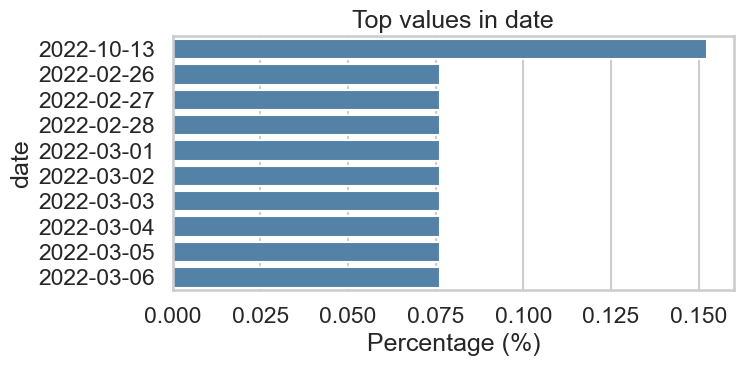

In [6]:
for col in df.select_dtypes(include="object"):
    # Top 10 + missing %
    counts = df[col].value_counts(dropna=True).head(10)
    counts = counts / len(df) * 100

    missing = df[col].isna().sum()
    if missing > 0:
        counts["<MISSING>"] = (missing / len(df)) * 100

    # Build a DataFrame for seaborn
    plot_df = counts.reset_index()
    plot_df.columns = [col, "Percentage"]

    # Define colors
    color_map = {v: "red" if v == "<MISSING>" else "steelblue" for v in plot_df[col]}

    plt.figure(figsize=(8, 4))
    ax = sns.barplot(
        data=plot_df,
        y=col,
        x="Percentage",
        hue=col,
        palette=color_map,
        orient="h",
        dodge=False,
        legend=False
    )

    ax.set_title(f"Top values in {col}")
    ax.set_xlabel("Percentage (%)")
    ax.set_ylabel(col)
    plt.tight_layout()
    plt.show()


In [7]:
# Print for each numeric column mean, median, std, min, max, quantiles
for col in df.select_dtypes(include="number"):
    print(f"{col}:")
    print(f"  Mean: {df[col].mean():,.2f}")
    print(f"  Median: {df[col].median():,.2f}")
    print(f"  Std: {df[col].std():,.2f}")
    print(f"  Min: {df[col].min():,.2f}")
    print(f"  Max: {df[col].max():,.2f}")
    print(f"  25th percentile: {df[col].quantile(0.25):,.2f}")
    print(f"  50th percentile: {df[col].quantile(0.50):,.2f}")
    print(f"  75th percentile: {df[col].quantile(0.75):,.2f}")

day:
  Mean: 657.50
  Median: 657.50
  Std: 378.89
  Min: 2.00
  Max: 1,313.00
  25th percentile: 329.75
  50th percentile: 657.50
  75th percentile: 985.25
aircraft:
  Mean: 7.12
  Median: 0.00
  Std: 48.92
  Min: 0.00
  Max: 372.00
  25th percentile: 0.00
  50th percentile: 0.00
  75th percentile: 0.00
helicopter:
  Mean: 6.42
  Median: 0.00
  Std: 44.27
  Min: 0.00
  Max: 335.00
  25th percentile: 0.00
  50th percentile: 0.00
  75th percentile: 0.00
tank:
  Mean: 166.17
  Median: 7.00
  Std: 1,165.54
  Min: 0.00
  Max: 10,761.00
  25th percentile: 3.00
  50th percentile: 7.00
  75th percentile: 12.00
APC:
  Mean: 332.43
  Median: 14.00
  Std: 2,337.81
  Min: 0.00
  Max: 22,401.00
  25th percentile: 7.00
  50th percentile: 14.00
  75th percentile: 24.00
field artillery:
  Mean: 347.38
  Median: 21.00
  Std: 2,487.10
  Min: 0.00
  Max: 27,329.00
  25th percentile: 7.00
  50th percentile: 21.00
  75th percentile: 39.00
MRL:
  Mean: 22.59
  Median: 1.00
  Std: 157.35
  Min: 0.00
  Max: 

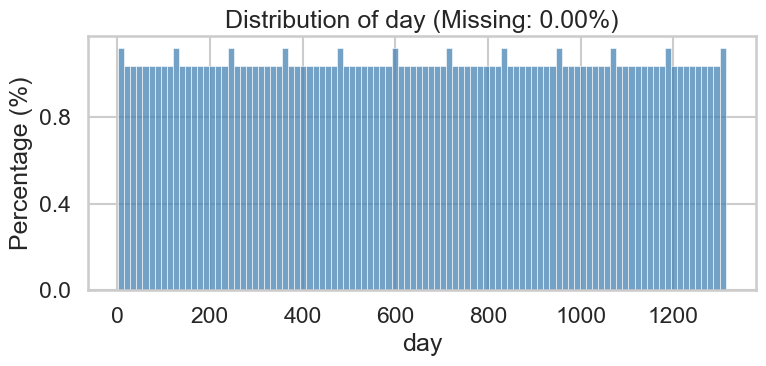

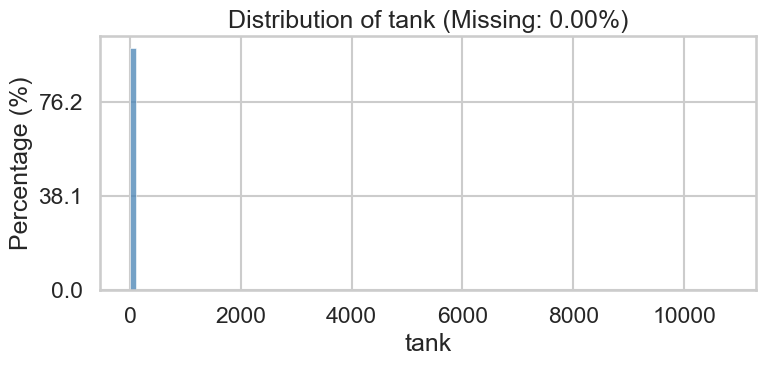

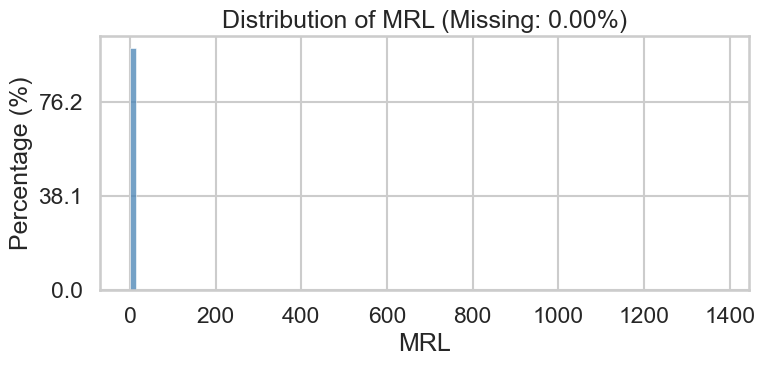

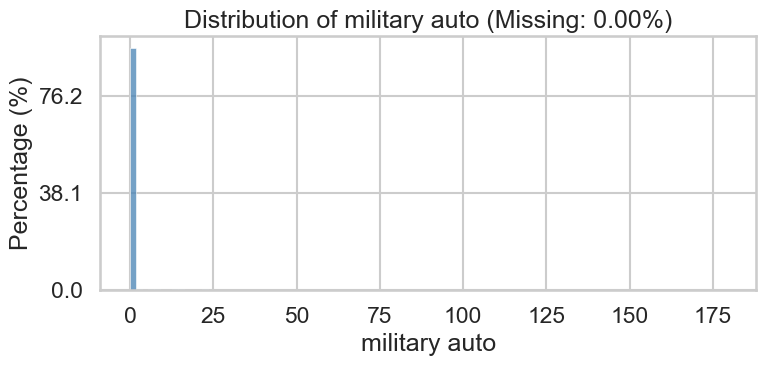

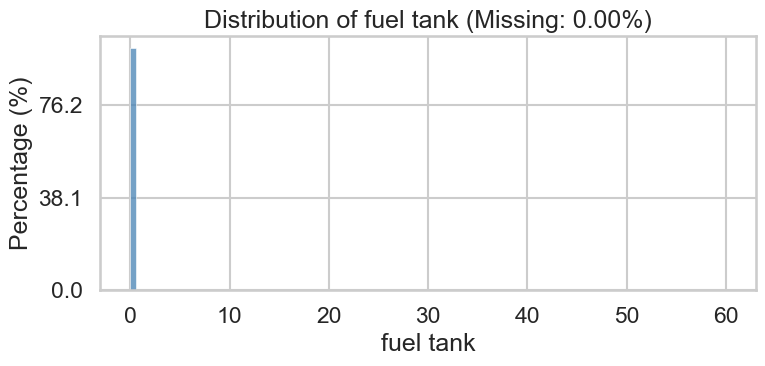

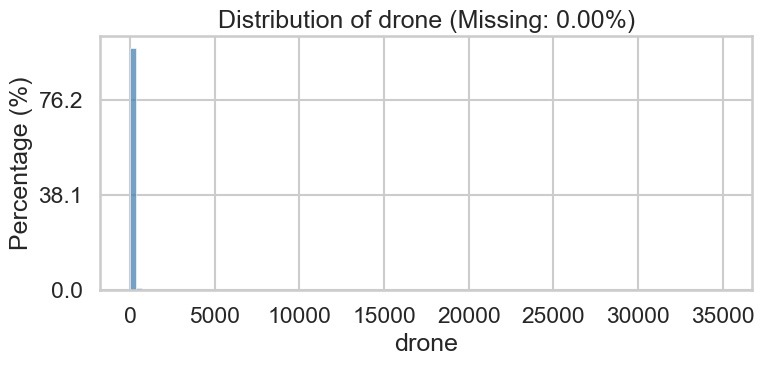

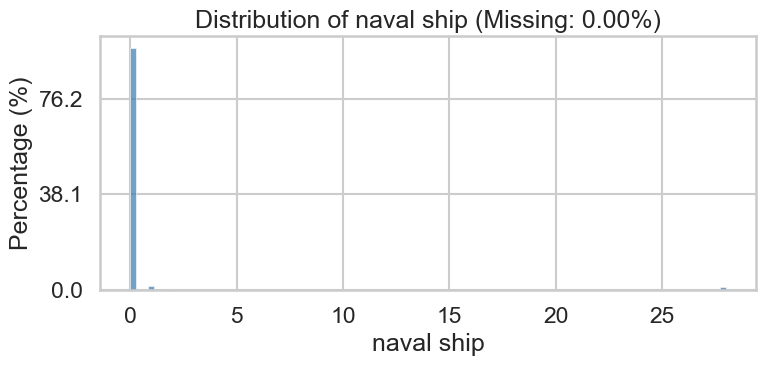

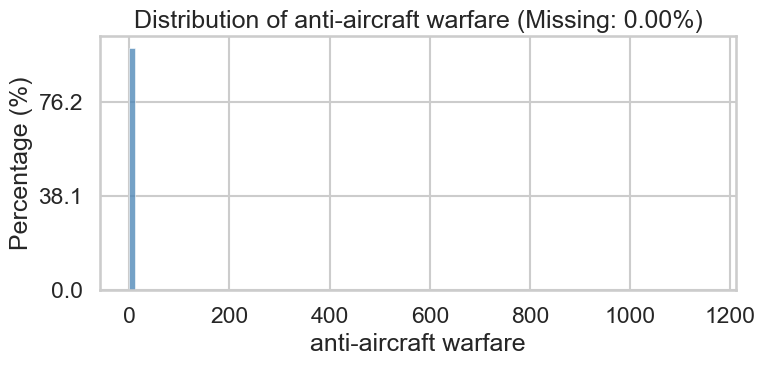

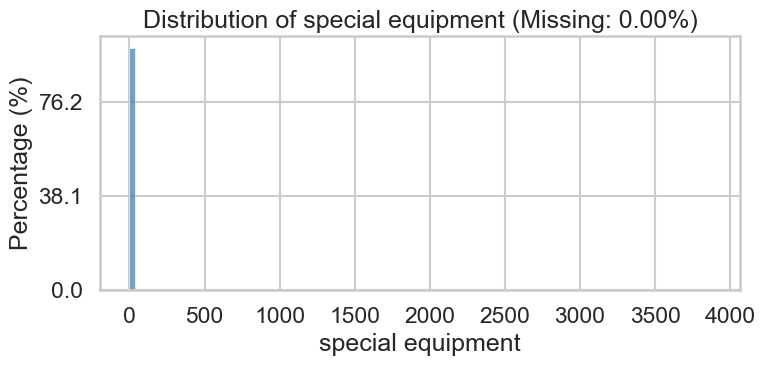

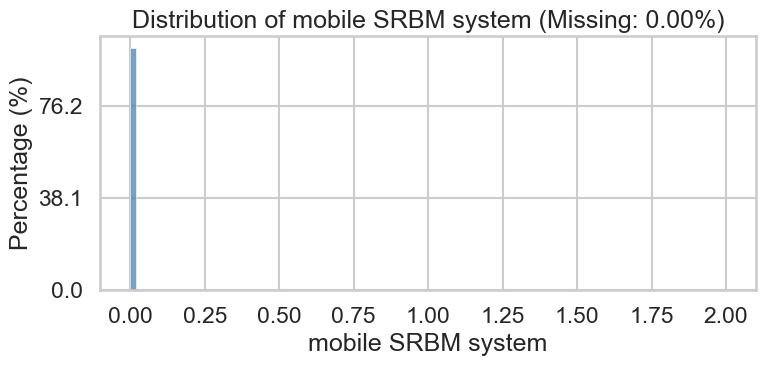

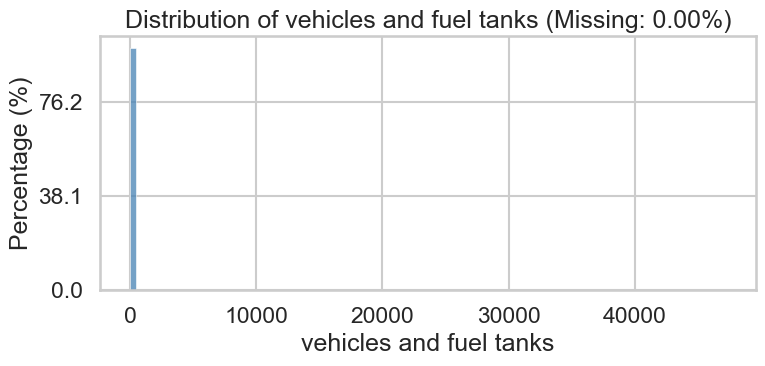

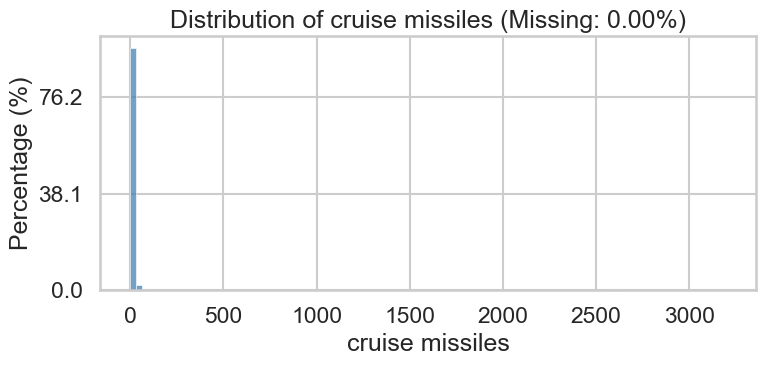

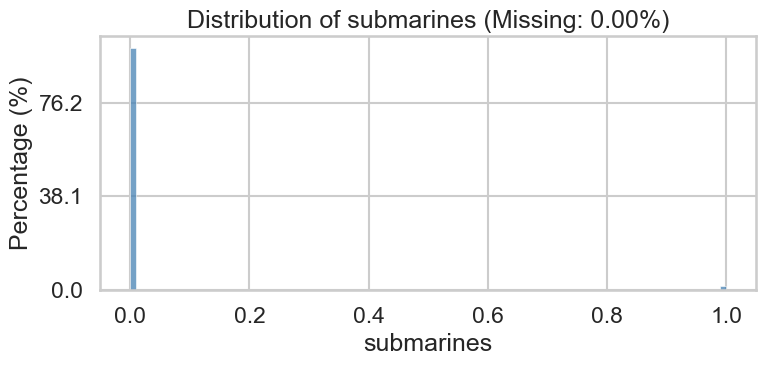

In [8]:
# For each numeric column, plot histogram with percentage on y-axis
for col in df.select_dtypes(include="number"):
    s = df[col]
    total = len(s)
    missing_pct = s.isna().mean() * 100

    plt.figure(figsize=(8, 4))
    ax = sns.histplot(
        s.dropna(),
        bins=100,
        stat="count",      # raw counts, we'll format y-axis
        color="steelblue",
        edgecolor=None
    )

    # Show y-axis as % of total rows
    ax.yaxis.set_major_formatter(
        FuncFormatter(lambda y, _: f"{(y/total)*100:.1f}")
    )

    ax.set_title(f"Distribution of {col} (Missing: {missing_pct:.2f}%)")
    ax.set_xlabel(col)
    ax.set_ylabel("Percentage (%)")

    plt.tight_layout()
    plt.show()

In [9]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def plot_loss_overview(df: pd.DataFrame, feature: str):
    """
    Plot a 2x2 overview of losses for a given feature:
    1) Daily losses
    2) Weekly losses
    3) Monthly losses
    4) Cumulative losses

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame with at least 'date' and the selected feature column.
    feature : str
        Name of the numeric column to plot.
    """
    # --- Ensure datetime ---
    if "date" not in df.columns:
        raise ValueError("DataFrame must contain a 'date' column.")
    df = df.copy()
    df["date"] = pd.to_datetime(df["date"])
    
    if feature not in df.columns:
        raise ValueError(f"Column '{feature}' not found in DataFrame.")
    
    # --- Prepare aggregations ---
    daily_df = df[["date", feature]].copy()

    weekly_df = (
        df.set_index("date")[feature]
          .resample("W")
          .sum()
          .reset_index()
    )

    monthly_df = (
        df.set_index("date")[feature]
          .resample("ME")
          .sum()
          .reset_index()
    )

    cumulative_df = daily_df.copy()
    cumulative_df["cumulative"] = cumulative_df[feature].cumsum()

    # --- Create 2×2 subplot grid ---
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=(
            f"Daily {feature.title()} Losses",
            f"Weekly {feature.title()} Losses",
            f"Monthly {feature.title()} Losses",
            f"Cumulative {feature.title()} Losses",
        )
    )

    # 1️⃣ Daily
    fig.add_trace(
        go.Scatter(
            x=daily_df["date"], y=daily_df[feature],
            mode="lines+markers", name="Daily"
        ),
        row=1, col=1
    )

    # 2️⃣ Weekly
    fig.add_trace(
        go.Scatter(
            x=weekly_df["date"], y=weekly_df[feature],
            mode="lines+markers", name="Weekly", line=dict(color="orange")
        ),
        row=1, col=2
    )

    # 3️⃣ Monthly
    fig.add_trace(
        go.Scatter(
            x=monthly_df["date"], y=monthly_df[feature],
            mode="lines+markers", name="Monthly", line=dict(color="green")
        ),
        row=2, col=1
    )

    # 4️⃣ Cumulative
    fig.add_trace(
        go.Scatter(
            x=cumulative_df["date"], y=cumulative_df["cumulative"],
            mode="lines", name="Cumulative", line=dict(color="red")
        ),
        row=2, col=2
    )

    # --- Layout formatting ---
    fig.update_layout(
        height=800, width=1100,
        title_text=f"{feature.title()} Losses Overview (Daily → Cumulative)",
        showlegend=False,
        template="plotly_white",
    )

    # Axis titles
    for i in range(1, 5):
        fig["layout"][f"xaxis{i}"].update(title="Date")
        fig["layout"][f"yaxis{i}"].update(title="Losses")

    fig.show()

plot_loss_overview(df, "tank")
plot_loss_overview(df, "aircraft")
plot_loss_overview(df, "helicopter")
plot_loss_overview(df, "drone")
plot_loss_overview(df, "personnel")

In [10]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def plot_moving_avg_and_momentum(df: pd.DataFrame, feature: str):
    """
    Plot daily losses with 7-day and 30-day moving averages,
    and rate of change (momentum) as a secondary subplot.

    Parameters
    ----------
    df : pd.DataFrame
        Must contain 'date' and the selected feature.
    feature : str
        Numeric column name to analyze.
    """
    if "date" not in df.columns:
        raise ValueError("DataFrame must contain a 'date' column.")
    if feature not in df.columns:
        raise ValueError(f"Column '{feature}' not found in DataFrame.")
    
    df = df.copy()
    df["date"] = pd.to_datetime(df["date"])
    
    # --- Compute moving averages and momentum ---
    df["MA_7"] = df[feature].rolling(7).mean()
    df["MA_30"] = df[feature].rolling(30).mean()
    df["Momentum"] = df[feature].pct_change() * 100  # % change (rate of change)
    
    # --- Create figure with two rows ---
    fig = make_subplots(
        rows=1, cols=1,
        shared_xaxes=True,
        vertical_spacing=0.12,
        subplot_titles=(
            f"{feature.title()} Losses with 7D & 30D Moving Averages",
            f"{feature.title()} Momentum (% Change per Day)"
        )
    )

    # 1️⃣ Top plot: raw + moving averages
    fig.add_trace(go.Scatter(
        x=df["date"], y=df[feature],
        mode="lines", name="Daily Losses",
        line=dict(color="steelblue", width=1)
    ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=df["date"], y=df["MA_7"],
        mode="lines", name="7-day MA",
        line=dict(color="orange", width=2)
    ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=df["date"], y=df["MA_30"],
        mode="lines", name="30-day MA",
        line=dict(color="green", width=2, dash="dash")
    ), row=1, col=1)

    # Axis titles
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Losses", row=1, col=1)

    fig.show()

plot_moving_avg_and_momentum(df, "personnel")

In [11]:
features = ["personnel", "tank", "aircraft", "helicopter", "drone", "fuel tank"]

fig = px.scatter_matrix(
    df,
    dimensions=features,
    title="Scatter Matrix of Key Loss Categories",
    height=800,
    color="personnel",
    color_continuous_scale="Reds"
)
fig.update_traces(diagonal_visible=False)
fig.show()


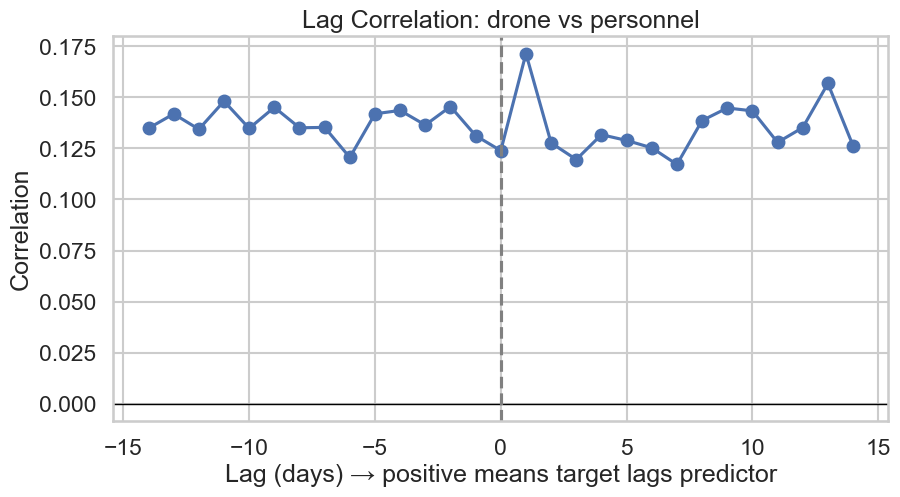

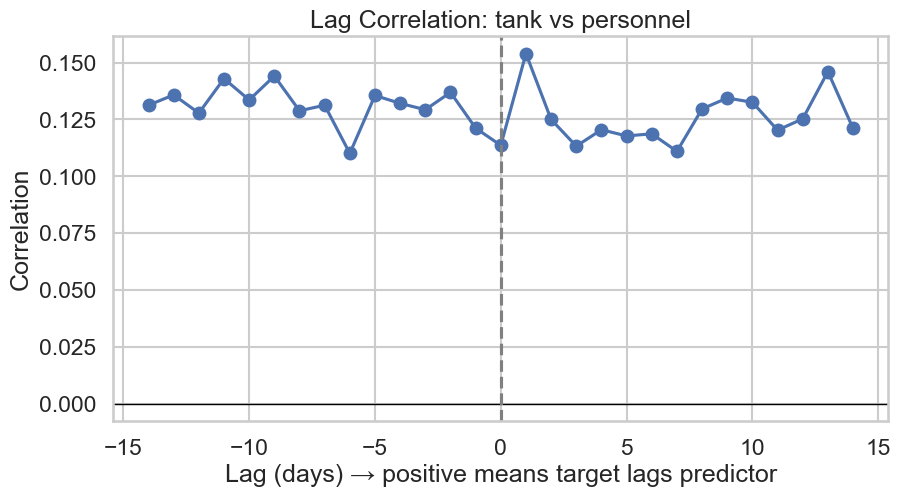

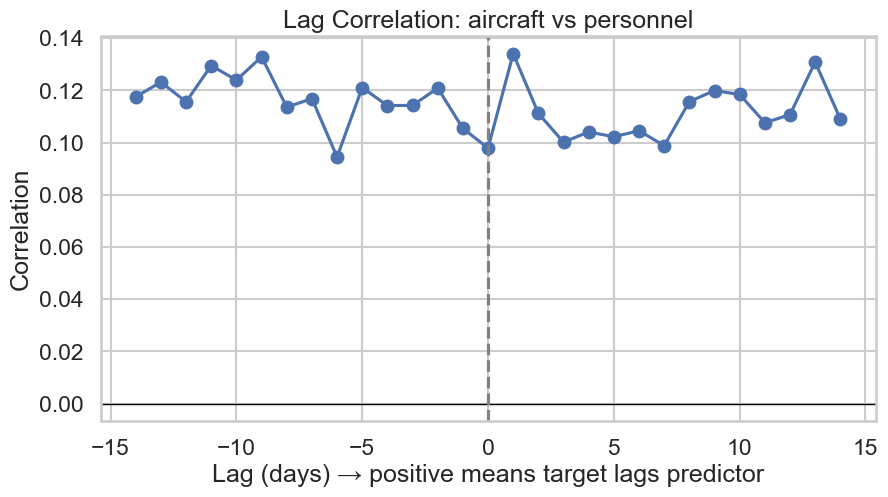

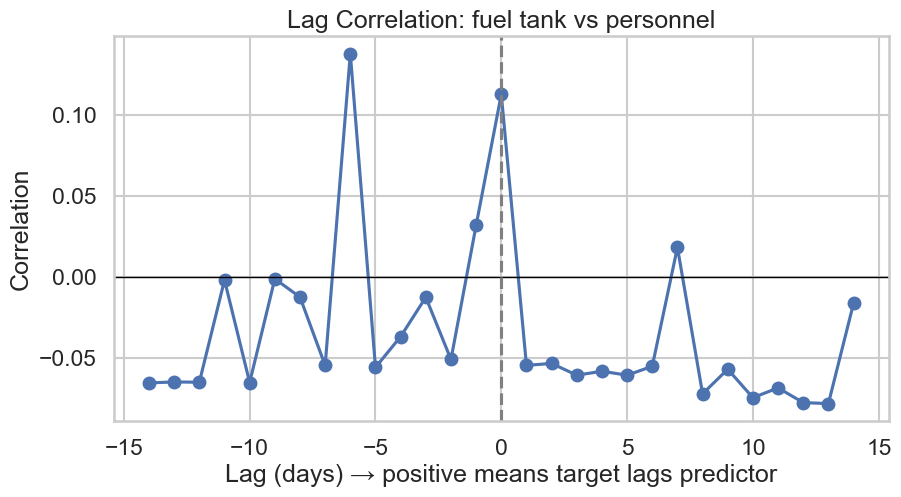

In [12]:
import matplotlib.pyplot as plt

def plot_lag_correlation(df, x_col, y_col, max_lag=14):
    """Compute and plot lag correlation between x and y."""
    correlations = []
    for lag in range(-max_lag, max_lag + 1):
        corr = df[x_col].corr(df[y_col].shift(lag))
        correlations.append((lag, corr))

    lags, corrs = zip(*correlations)
    plt.figure(figsize=(10, 5))
    plt.plot(lags, corrs, marker="o")
    plt.axhline(0, color="black", lw=1)
    plt.axvline(0, color="gray", linestyle="--")
    plt.title(f"Lag Correlation: {x_col} vs {y_col}")
    plt.xlabel("Lag (days) → positive means target lags predictor")
    plt.ylabel("Correlation")
    plt.grid(True)
    plt.show()

plot_lag_correlation(df, "drone", "personnel", max_lag=14)
plot_lag_correlation(df, "tank", "personnel", max_lag=14)
plot_lag_correlation(df, "aircraft", "personnel", max_lag=14)
plot_lag_correlation(df, "helicopter", "personnel", max_lag=14)
plot_lag_correlation(df, "fuel tank", "personnel", max_lag=14)


In [13]:
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df["weekday"] = df["date"].dt.day_name()
df["month"] = df["date"].dt.month_name()

# Average losses by weekday
fig1 = px.bar(
    df.groupby("weekday", sort=False)["personnel"].mean().reindex([
        "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
    ]),
    title="Average Personnel Losses by Day of Week",
    labels={"value": "Avg Losses", "index": "Weekday"},
    color_discrete_sequence=["indianred"]
)
fig1.show()

# Average losses by month
fig2 = px.bar(
    df.groupby("month")["personnel"].mean().reindex([
        "January", "February", "March", "April", "May", "June", "July",
        "August", "September", "October", "November", "December"
    ]),
    title="Average Personnel Losses by Month",
    labels={"value": "Avg Losses", "index": "Month"},
    color_discrete_sequence=["royalblue"]
)
fig2.show()


In [14]:
import pandas as pd
import plotly.express as px

cols = ["personnel", "tank", "aircraft", "helicopter", "drone", "fuel tank"]

# --- Prepare monthly aggregated data ---
monthly_df = (
    df.set_index("date")[cols]
      .resample("ME")
      .sum()
      .reset_index()
)

# --- Compute total and proportions ---
monthly_df["total"] = monthly_df[cols].sum(axis=1)

for c in cols:
    monthly_df[c] = monthly_df[c] / monthly_df["total"]

# --- Plot proportional stacked area chart ---
fig = px.area(
    monthly_df,
    x="date",
    y=cols,
    title="Monthly Proportional Composition of Losses",
    labels={"value": "Proportion of Total", "variable": "Category"},
)
fig.update_layout(
    yaxis=dict(tickformat=".0%"),
    template="plotly_white",
    hovermode="x unified"
)
fig.show()


In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# --- Prepare resampling scenarios ---
def resample_scenario(df, freq):
    """
    freq: "D" (daily), "W" (weekly), "ME" (monthly)
    """
    df = df.copy()
    df["date"] = pd.to_datetime(df["date"])
    df_res = df.set_index("date").resample(freq).sum().reset_index()
    df_res["freq"] = freq
    return df_res

def make_sequences(data, lookback=30):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i - lookback:i])
        y.append(data[i])
    return np.array(X), np.array(y)

scenarios = {
    "Daily": resample_scenario(df, "D"),
    "Weekly": resample_scenario(df, "W"),
    "Monthly": resample_scenario(df, "ME"),
}

target_col = "personnel"


In [16]:
def smape(y_true, y_pred):
    denom = np.abs(y_true) + np.abs(y_pred)
    return np.mean(2 * np.abs(y_pred - y_true) / np.maximum(denom, 1e-8))

def evaluate_model(model, X_test, y_test, scaler, name):
    pred = model.predict(X_test)
    y_true = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    y_pred = scaler.inverse_transform(pred.flatten().reshape(-1, 1)).flatten()
    return {
        "Model": name,
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "sMAPE": smape(y_true, y_pred)
    }, y_true, y_pred


In [17]:
def build_lstm(input_shape):
    inputs = keras.Input(shape=input_shape)
    x = keras.layers.LSTM(64, return_sequences=True)(inputs)
    x = keras.layers.LSTM(32)(x)
    x = keras.layers.Dense(16, activation="relu")(x)
    outputs = keras.layers.Dense(1)(x)
    model = keras.Model(inputs, outputs)
    return model


In [18]:
def build_gru(input_shape):
    inputs = keras.Input(shape=input_shape)
    x = keras.layers.GRU(64, return_sequences=True)(inputs)
    x = keras.layers.GRU(32)(x)
    x = keras.layers.Dense(16, activation="relu")(x)
    outputs = keras.layers.Dense(1)(x)
    model = keras.Model(inputs, outputs)
    return model


In [19]:
def build_cnn(input_shape):
    inputs = keras.Input(shape=input_shape)
    x = keras.layers.Conv1D(32, 3, activation="relu")(inputs)
    x = keras.layers.Conv1D(16, 3, activation="relu")(x)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(32, activation="relu")(x)
    outputs = keras.layers.Dense(1)(x)
    model = keras.Model(inputs, outputs)
    return model


In [20]:
def build_bilstm(input_shape):
    inputs = keras.Input(shape=input_shape)
    x = keras.layers.Bidirectional(keras.layers.LSTM(64, return_sequences=True))(inputs)
    x = keras.layers.Bidirectional(keras.layers.LSTM(32))(x)
    x = keras.layers.Dense(16, activation="relu")(x)
    outputs = keras.layers.Dense(1)(x)
    model = keras.Model(inputs, outputs)
    return model


In [21]:
def build_rnn(input_shape):
    inputs = keras.Input(shape=input_shape)
    x = keras.layers.SimpleRNN(64, return_sequences=True)(inputs)
    x = keras.layers.SimpleRNN(32)(x)
    x = keras.layers.Dense(16, activation="relu")(x)
    outputs = keras.layers.Dense(1)(x)
    model = keras.Model(inputs, outputs)
    return model


In [22]:
def build_mlp(input_shape):
    inputs = keras.Input(shape=input_shape)
    x = keras.layers.Flatten()(inputs)
    x = keras.layers.Dense(128, activation="relu")(x)
    x = keras.layers.Dense(64, activation="relu")(x)
    outputs = keras.layers.Dense(1)(x)
    model = keras.Model(inputs, outputs)
    return model


In [23]:
def build_transformer(input_shape, num_heads=2, ff_dim=32):
    inputs = keras.Input(shape=input_shape)
    x = keras.layers.LayerNormalization(epsilon=1e-6)(inputs)
    attn_output = keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=ff_dim)(x, x)
    x = keras.layers.Add()([x, attn_output])
    ffn = keras.Sequential([
        keras.layers.Dense(ff_dim, activation="relu"),
        keras.layers.Dense(input_shape[-1])
    ])
    x = keras.layers.Add()([x, ffn(x)])
    x = keras.layers.GlobalAveragePooling1D()(x)
    outputs = keras.layers.Dense(1)(x)
    model = keras.Model(inputs, outputs)
    return model



=== Training on Daily data ===

Training Daily - LSTM (MSE, Adam)...
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step



Training Daily - LSTM (MSE, RMSprop)...
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step


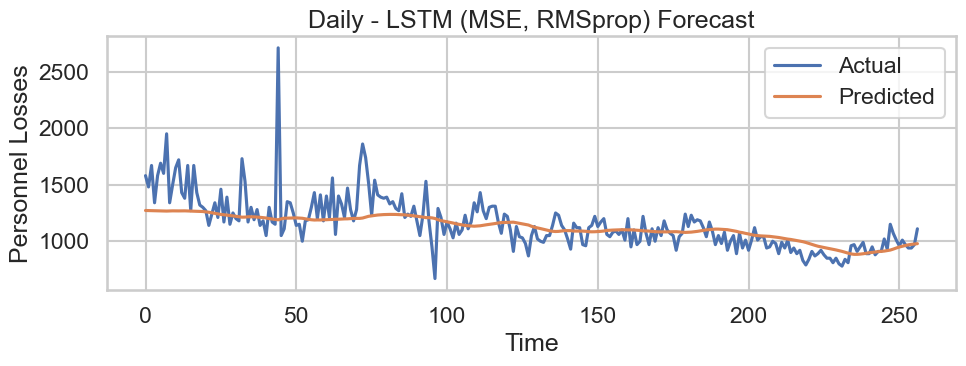


Training Daily - LSTM (MAE, Adam)...
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step


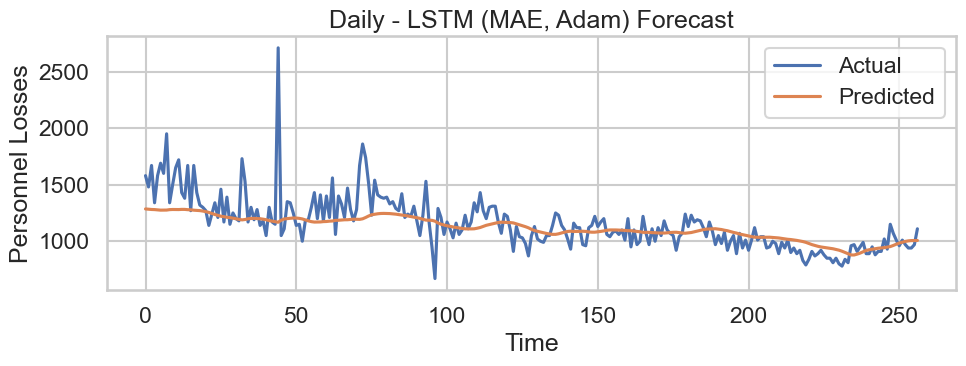


Training Daily - LSTM (MAE, RMSprop)...
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step



Training Daily - LSTM (Huber, Adam)...
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step



Training Daily - LSTM (Huber, RMSprop)...
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step


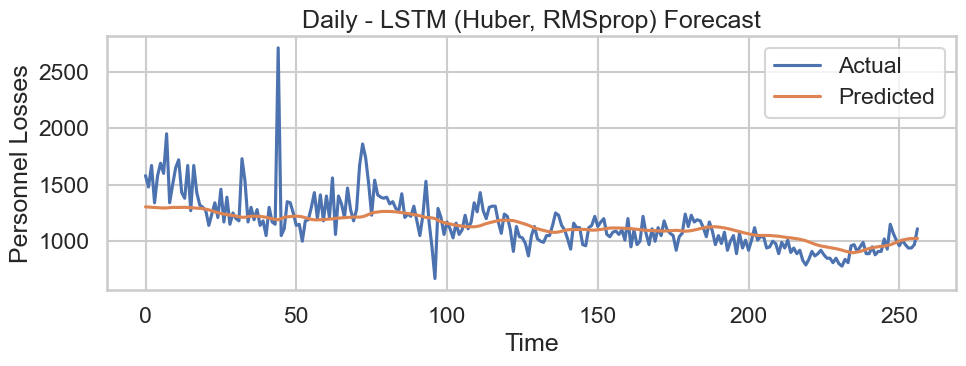


Training Daily - GRU (MSE, Adam)...
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step


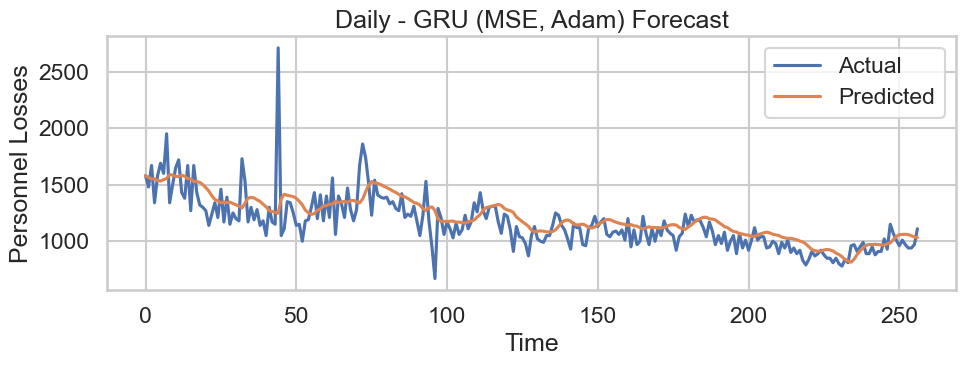


Training Daily - GRU (MSE, RMSprop)...
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step


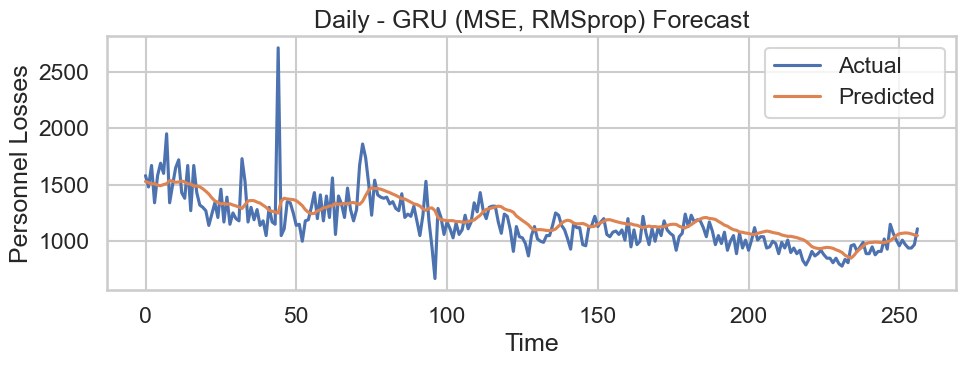


Training Daily - GRU (MAE, Adam)...
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step


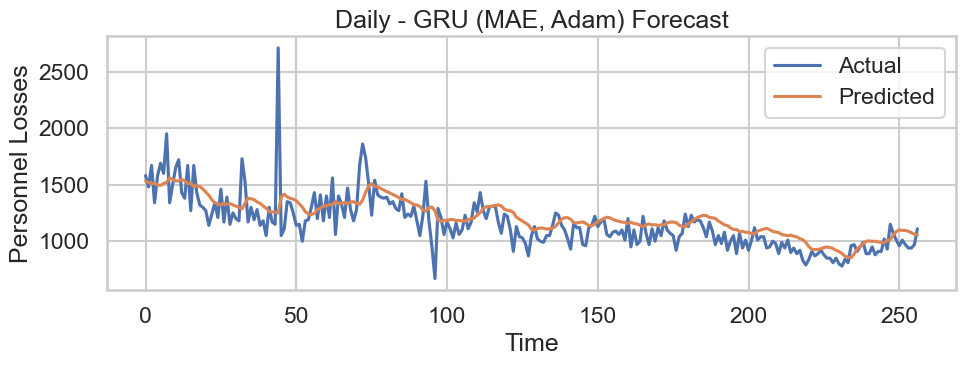


Training Daily - GRU (MAE, RMSprop)...
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step


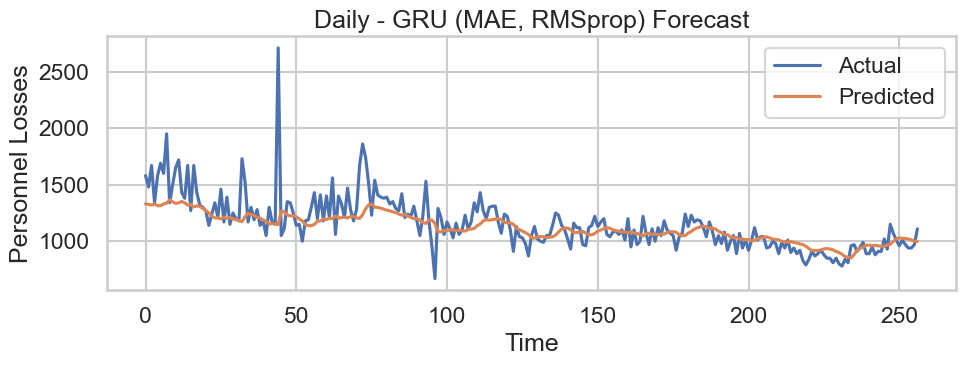


Training Daily - GRU (Huber, Adam)...
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step



Training Daily - GRU (Huber, RMSprop)...
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step


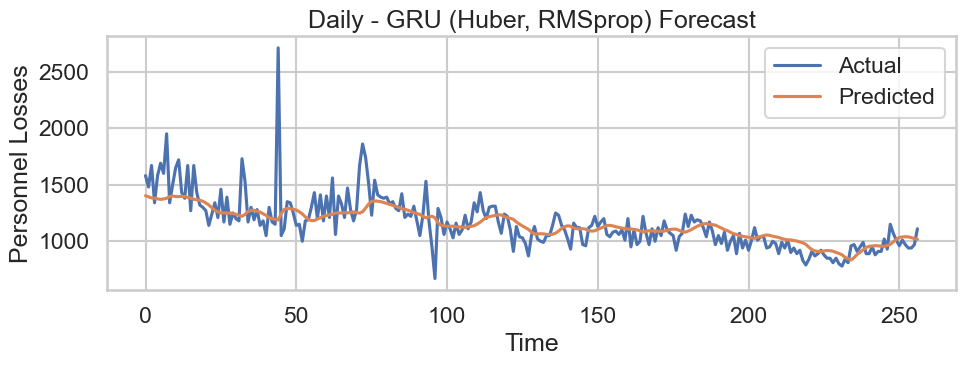


Training Daily - CNN (MSE, Adam)...
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


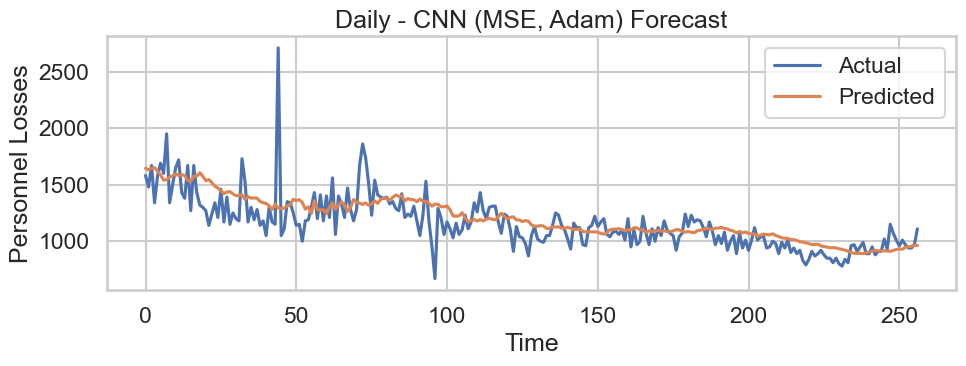


Training Daily - CNN (MSE, RMSprop)...
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 



Training Daily - CNN (MAE, Adam)...
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 



Training Daily - CNN (MAE, RMSprop)...
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 



Training Daily - CNN (Huber, Adam)...
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


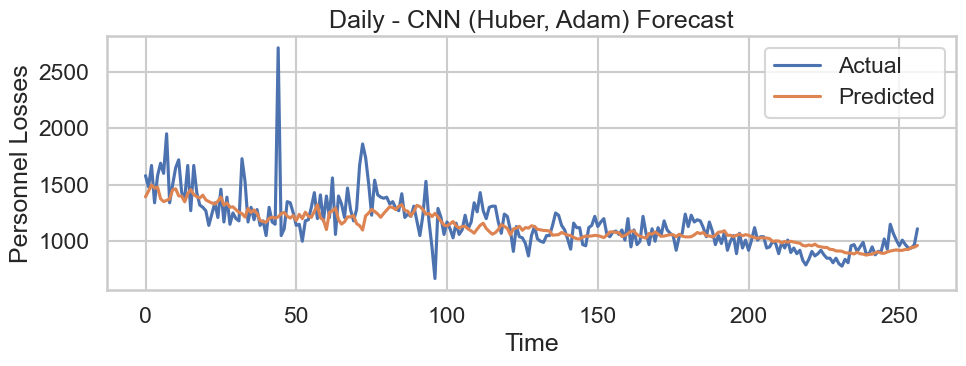


Training Daily - CNN (Huber, RMSprop)...
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


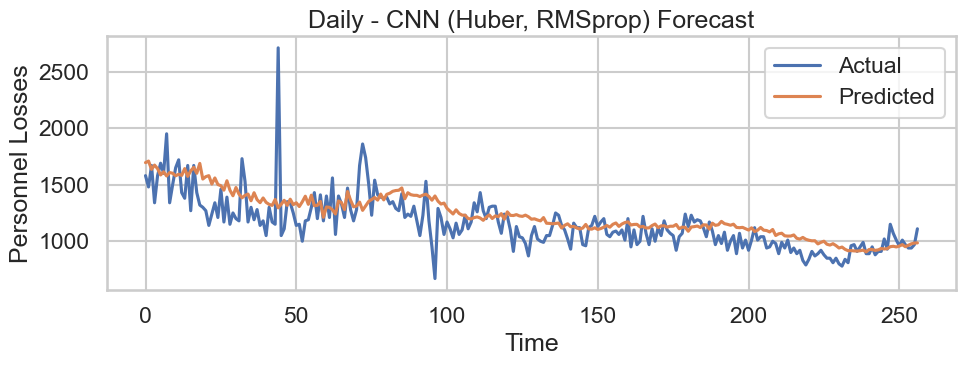


Training Daily - RNN (MSE, Adam)...
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step



Training Daily - RNN (MSE, RMSprop)...
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


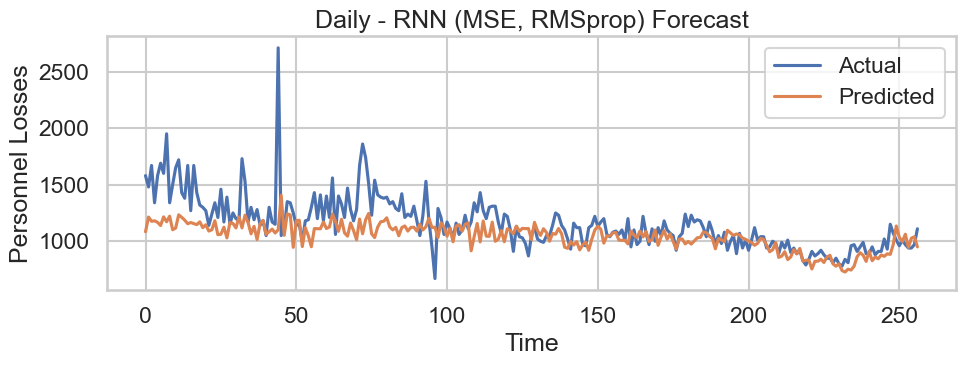


Training Daily - RNN (MAE, Adam)...
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step


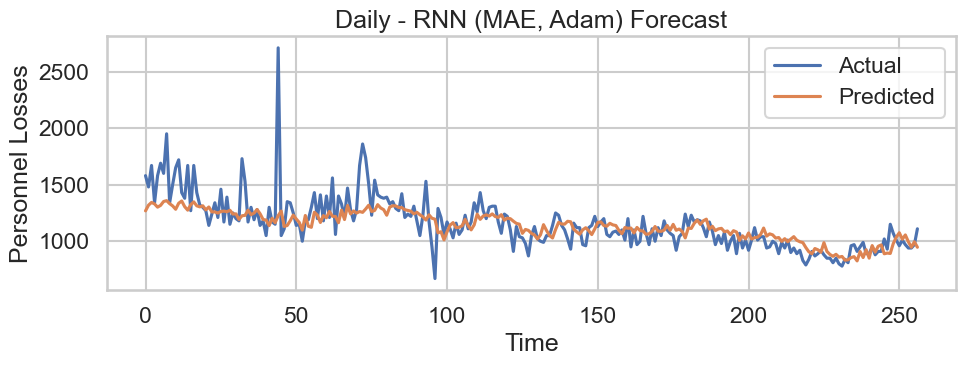


Training Daily - RNN (MAE, RMSprop)...
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


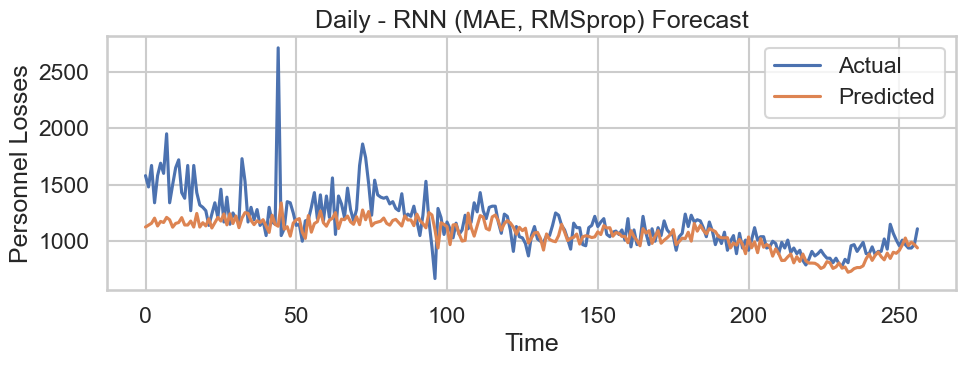


Training Daily - RNN (Huber, Adam)...
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


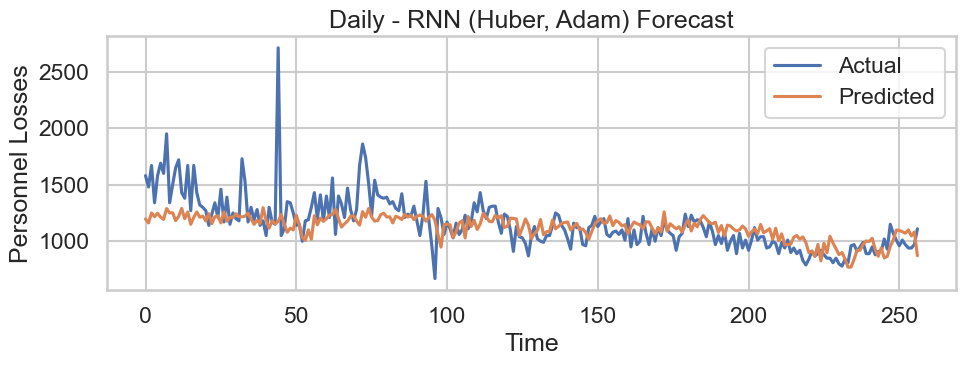


Training Daily - RNN (Huber, RMSprop)...
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


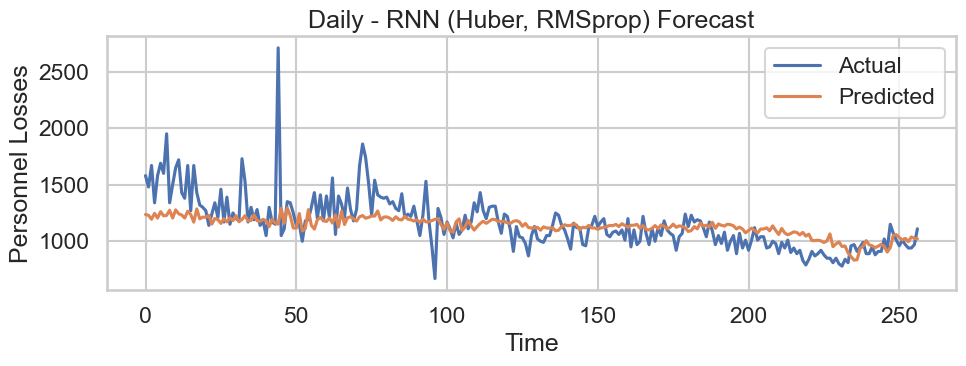


=== Training on Weekly data ===

Training Weekly - LSTM (MSE, Adam)...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


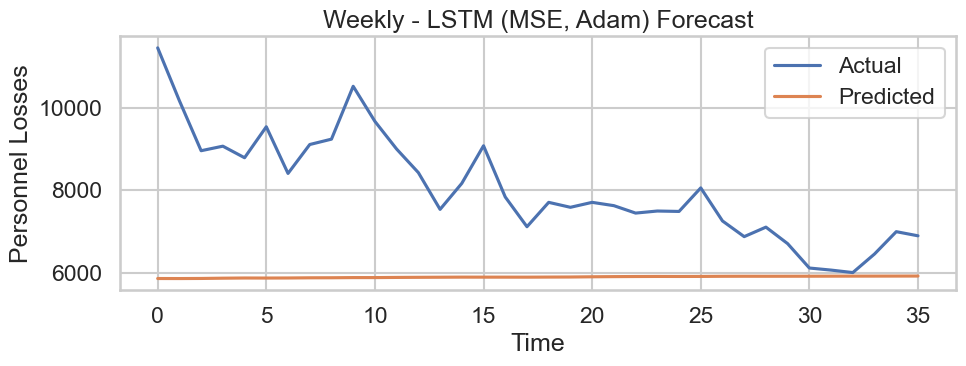


Training Weekly - LSTM (MSE, RMSprop)...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


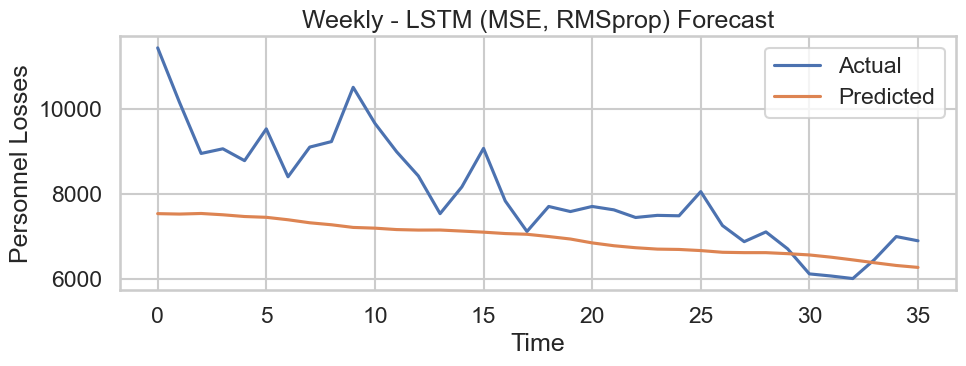


Training Weekly - LSTM (MAE, Adam)...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


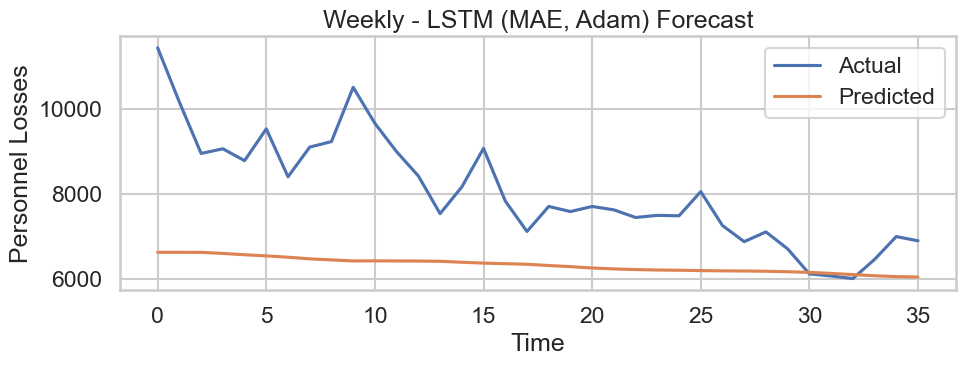


Training Weekly - LSTM (MAE, RMSprop)...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


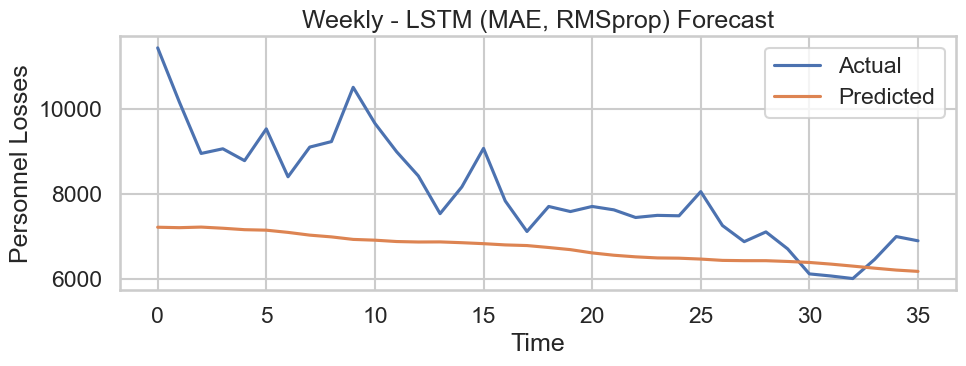


Training Weekly - LSTM (Huber, Adam)...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


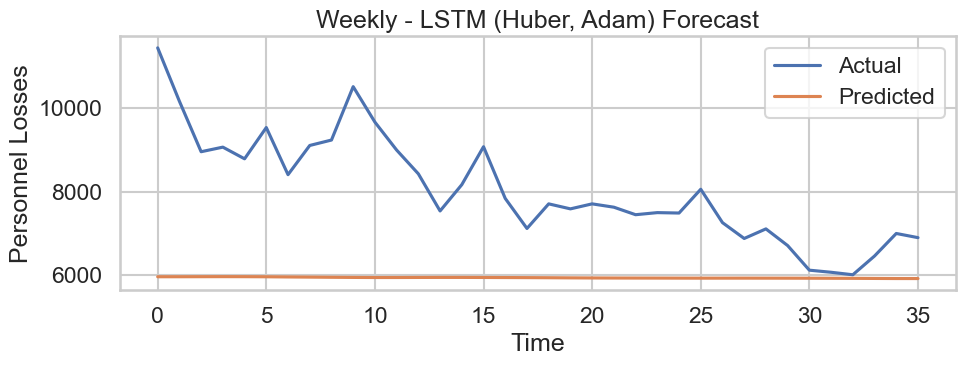


Training Weekly - LSTM (Huber, RMSprop)...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step



Training Weekly - GRU (MSE, Adam)...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step



Training Weekly - GRU (MSE, RMSprop)...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


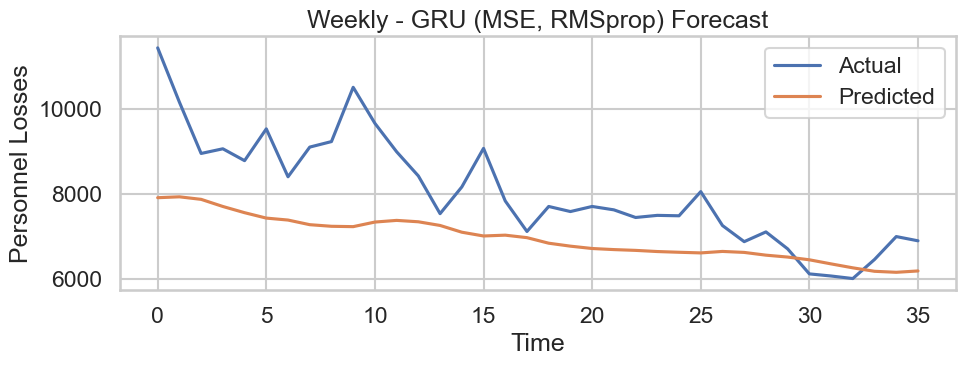


Training Weekly - GRU (MAE, Adam)...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


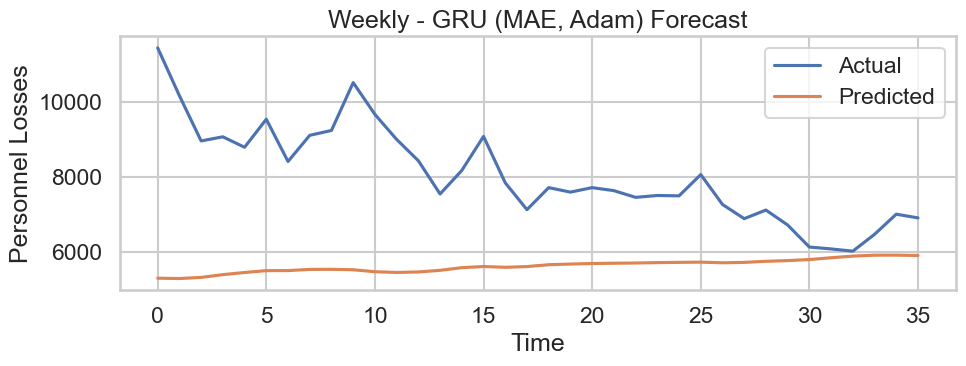


Training Weekly - GRU (MAE, RMSprop)...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


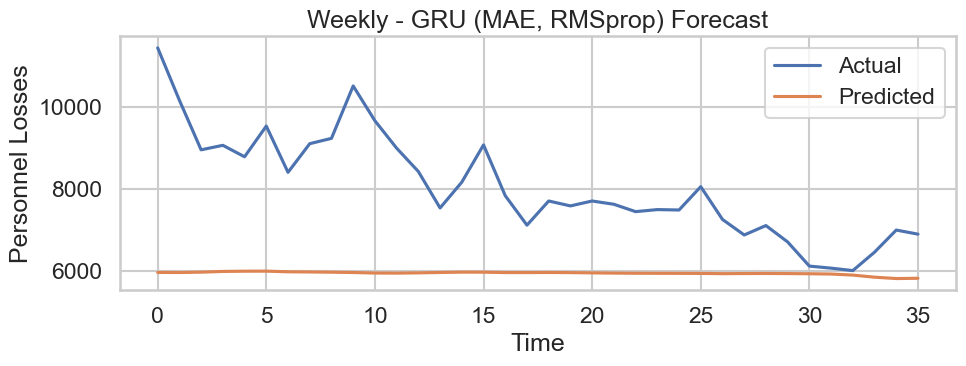


Training Weekly - GRU (Huber, Adam)...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


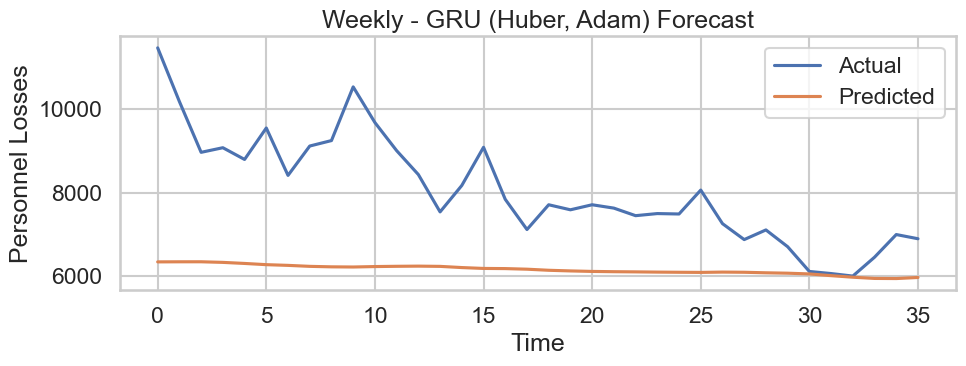


Training Weekly - GRU (Huber, RMSprop)...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


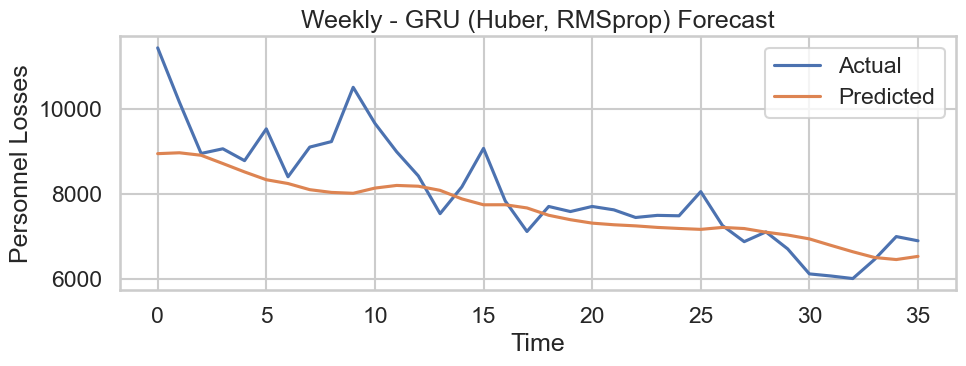


Training Weekly - CNN (MSE, Adam)...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


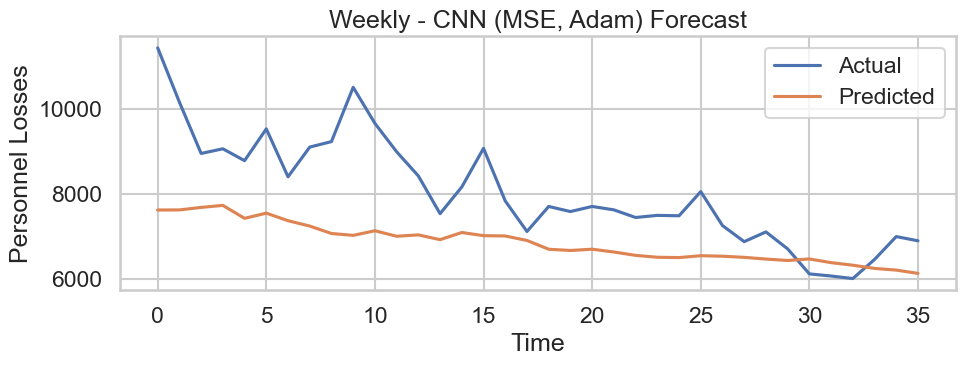


Training Weekly - CNN (MSE, RMSprop)...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


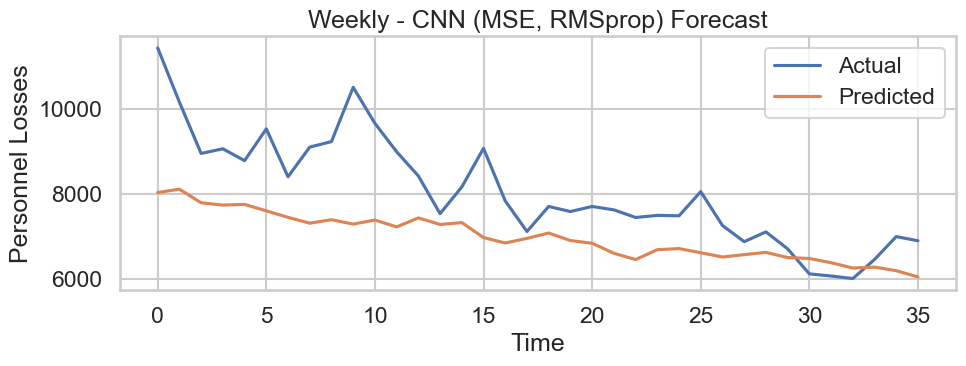


Training Weekly - CNN (MAE, Adam)...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


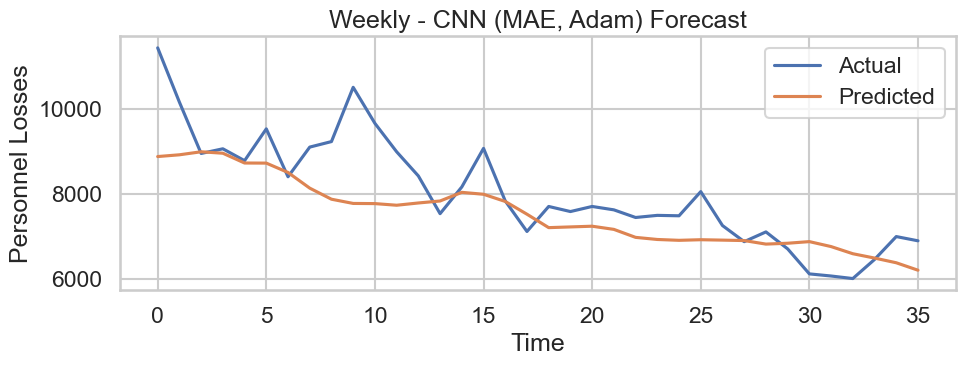


Training Weekly - CNN (MAE, RMSprop)...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


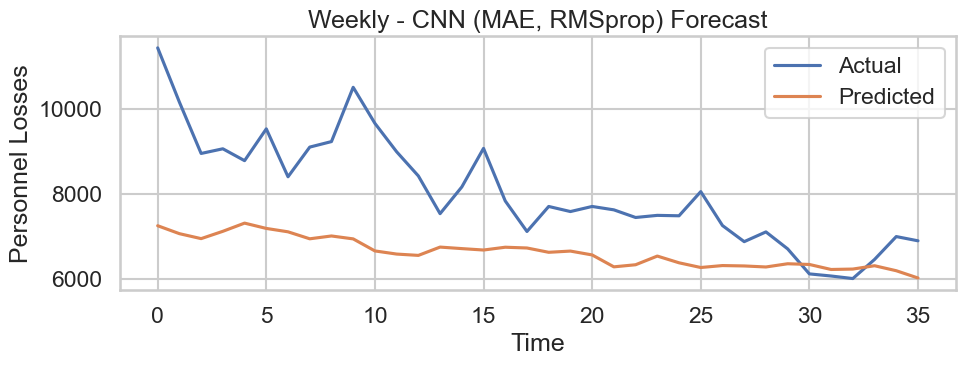


Training Weekly - CNN (Huber, Adam)...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


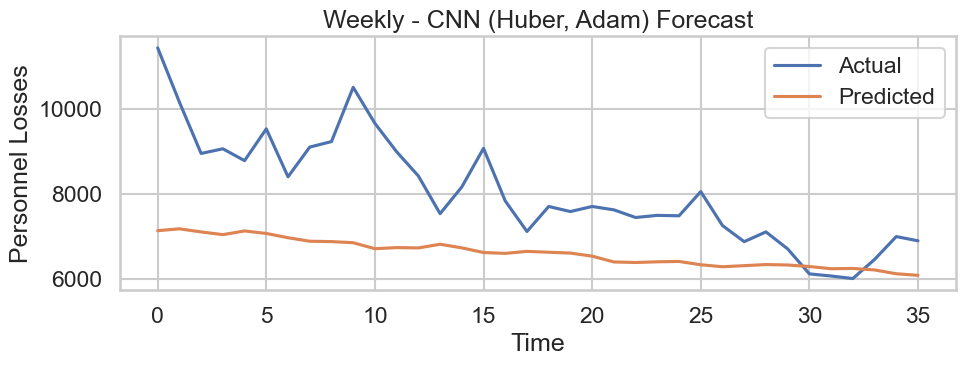


Training Weekly - CNN (Huber, RMSprop)...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


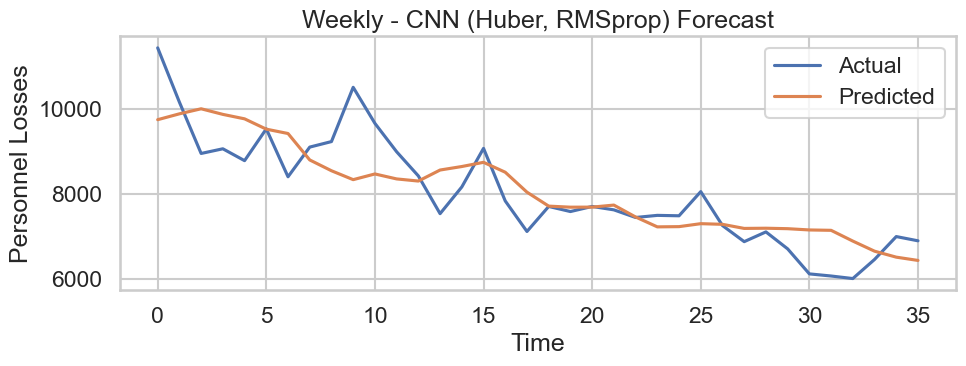


Training Weekly - RNN (MSE, Adam)...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


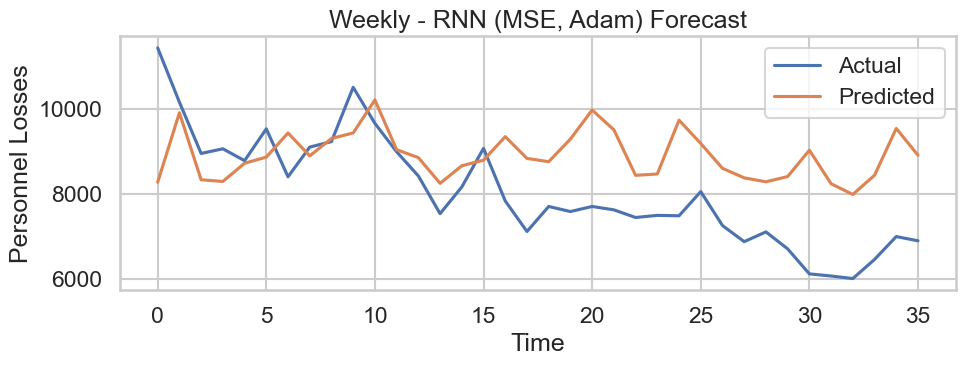


Training Weekly - RNN (MSE, RMSprop)...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


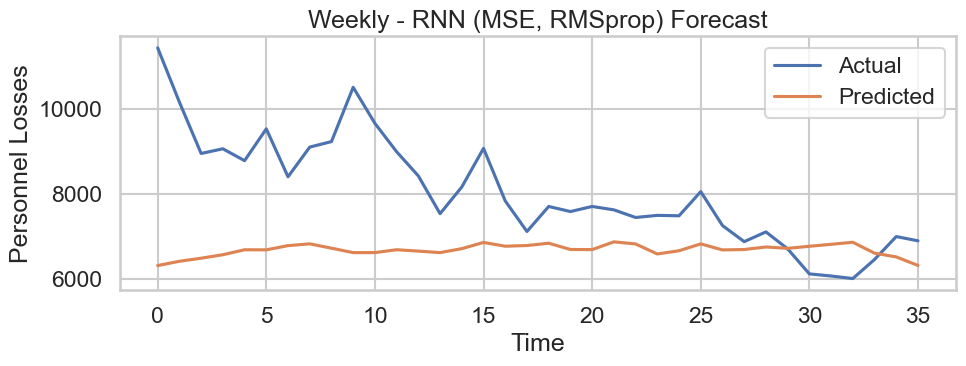


Training Weekly - RNN (MAE, Adam)...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


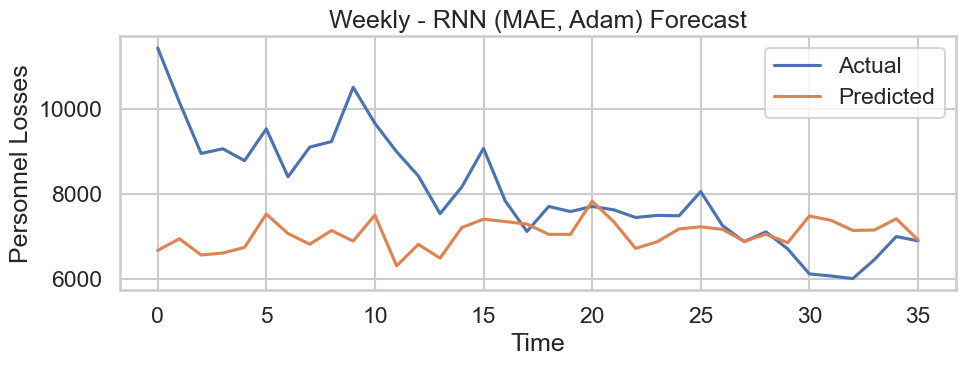


Training Weekly - RNN (MAE, RMSprop)...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


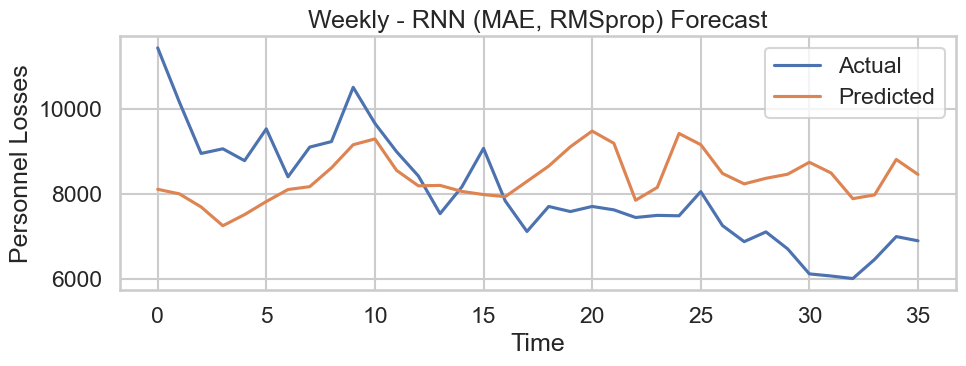


Training Weekly - RNN (Huber, Adam)...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


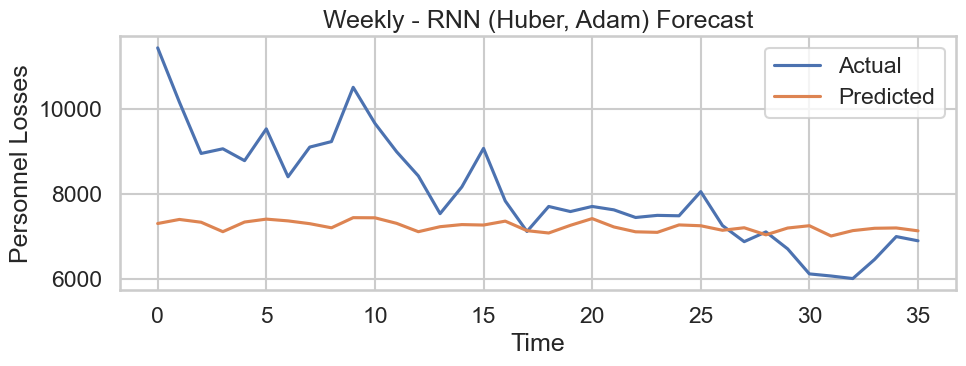


Training Weekly - RNN (Huber, RMSprop)...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


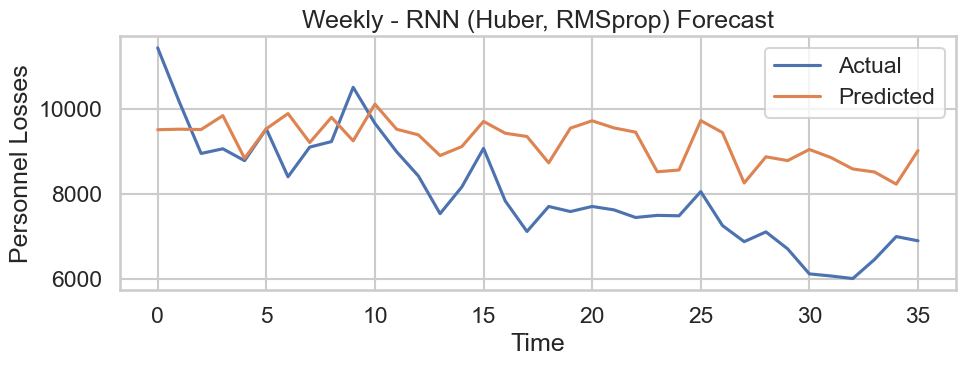


=== Training on Monthly data ===
Not enough samples for Monthly. Skipping.


In [24]:
loss_functions = {
    "MSE": keras.losses.MeanSquaredError(),
    "MAE": keras.losses.MeanAbsoluteError(),
    "Huber": keras.losses.Huber(),
    # "LogCosh": keras.losses.LogCosh(),
    # "MSLE": keras.losses.MeanSquaredLogarithmicError(),
}

model_builders = {
    "LSTM": lambda input_shape: build_lstm(input_shape),
    "GRU": lambda input_shape: build_gru(input_shape),
    "CNN": lambda input_shape: build_cnn(input_shape),
    "RNN": lambda input_shape: build_rnn(input_shape),
    # "BiLSTM": lambda input_shape: build_bilstm(input_shape),
    # "MLP": lambda input_shape: build_mlp(input_shape)
}

optimizer_builders = {
    "Adam": lambda: keras.optimizers.Adam(learning_rate=0.001),
    "RMSprop": lambda: keras.optimizers.RMSprop(learning_rate=0.001),
    # "Nadam": lambda: keras.optimizers.Nadam(learning_rate=0.001),
}


# --- Train loop ---
all_results = []

for scenario_name, df_scenario in scenarios.items():
    print(f"\n=== Training on {scenario_name} data ===")

    # Prepare target
    y = df_scenario[target_col].astype(float).values
    scaler = StandardScaler()
    y_scaled = scaler.fit_transform(y.reshape(-1, 1)).flatten()

    # Build sequences (reduce lookback for longer intervals)
    lookback = 30 if scenario_name == "Daily" else 10 if scenario_name == "Weekly" else 5
    X, y_seq = make_sequences(y_scaled, lookback)

    # Skip if not enough data
    if len(X) < 100:
        print(f"Not enough samples for {scenario_name}. Skipping.")
        continue

    # Split
    split = int(len(X) * 0.8)
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y_seq[:split], y_seq[split:]
    X_train = np.expand_dims(X_train, -1)
    X_test = np.expand_dims(X_test, -1)

    # Train each model/loss/optimizer combination
    for model_name, model_fn in model_builders.items():
        for loss_name, loss_fn in loss_functions.items():
            for opt_name, opt_fn in optimizer_builders.items():
                model = model_fn(X_train.shape[1:])
                optimizer = opt_fn()
                model.compile(optimizer=optimizer, loss=loss_fn)
                model.run_eagerly = True

                name = f"{scenario_name} - {model_name} ({loss_name}, {opt_name})"
                print(f"\nTraining {name}...")

                callbacks = [
                    keras.callbacks.EarlyStopping(monitor="val_loss", patience=8, restore_best_weights=True)
                ]

                history = model.fit(
                    X_train, y_train,
                    epochs=1,
                    batch_size=32,
                    validation_split=0.1,
                    callbacks=callbacks,
                    verbose=0
                )

                res, y_true, y_pred = evaluate_model(model, X_test, y_test, scaler, name)
                res["Scenario"] = scenario_name
                all_results.append(res)

                # Plot
                plt.figure(figsize=(10, 4))
                plt.plot(y_true, label="Actual")
                plt.plot(y_pred, label="Predicted")
                plt.title(f"{name} Forecast")
                plt.xlabel("Time")
                plt.ylabel("Personnel Losses")
                plt.legend()
                plt.tight_layout()
                plt.show()


                             Model          MAE         RMSE     sMAPE  \
10       Daily - GRU (Huber, Adam)   103.734254   168.442740  0.085844   
11    Daily - GRU (Huber, RMSprop)   104.059191   167.335729  0.086220   
9       Daily - GRU (MAE, RMSprop)   105.928422   174.964958  0.087175   
20         Daily - RNN (MAE, Adam)   108.486910   172.859395  0.089787   
13      Daily - CNN (MSE, RMSprop)   110.907248   168.374546  0.091843   
16       Daily - CNN (Huber, Adam)   112.441367   175.845901  0.093592   
14         Daily - CNN (MAE, Adam)   112.508134   180.458034  0.093461   
2         Daily - LSTM (MAE, Adam)   114.345826   183.784971  0.094483   
5    Daily - LSTM (Huber, RMSprop)   114.509929   180.209163  0.095004   
1      Daily - LSTM (MSE, RMSprop)   115.991502   184.241062  0.095855   
3      Daily - LSTM (MAE, RMSprop)   116.568460   173.178385  0.097265   
6          Daily - GRU (MSE, Adam)   118.213370   170.545345  0.097731   
7       Daily - GRU (MSE, RMSprop)   1

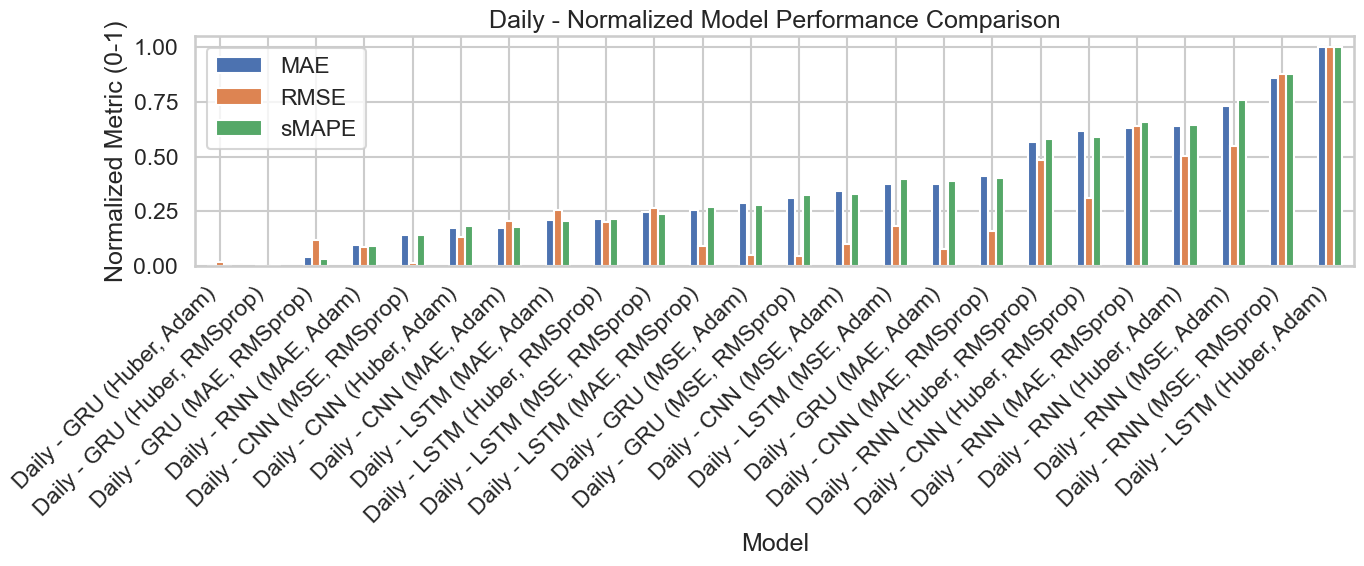

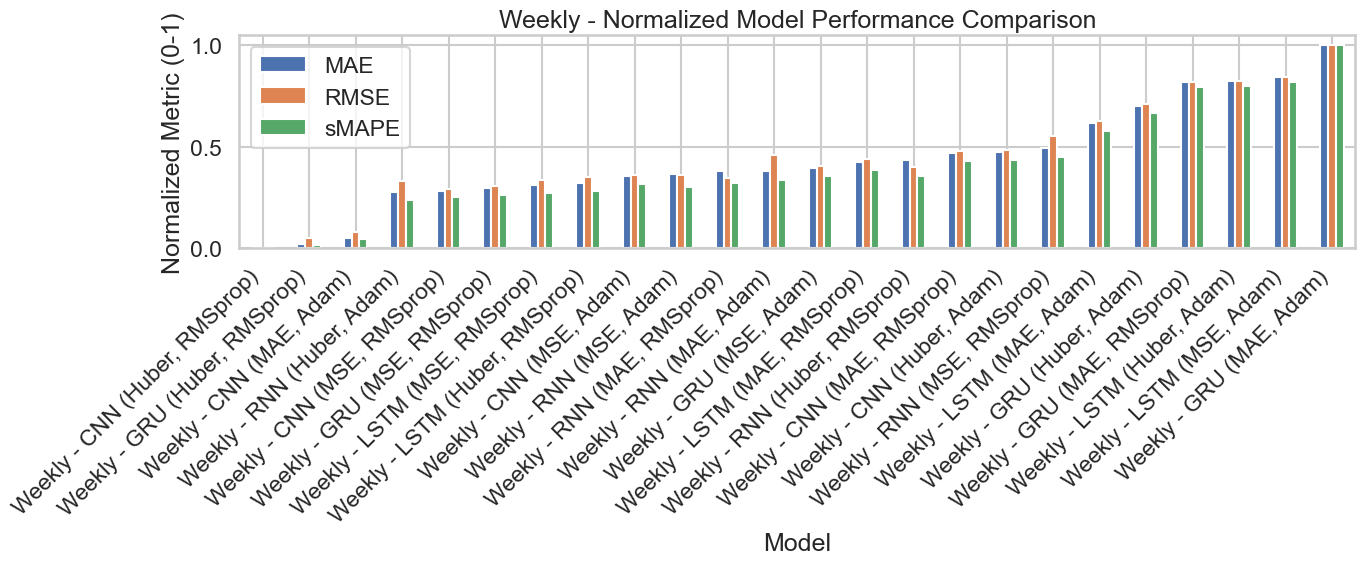

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

# Assume `all_results` or `results` contains a "Scenario" column
results_df = pd.DataFrame(all_results).sort_values(["Scenario", "MAE"])
print(results_df)

metrics = ["MAE", "RMSE", "sMAPE"]

# --- Normalize metrics within each scenario ---
norm_df = results_df.copy()
for scen in norm_df["Scenario"].unique():
    scen_mask = norm_df["Scenario"] == scen
    for m in metrics:
        vals = norm_df.loc[scen_mask, m]
        norm_df.loc[scen_mask, m] = (vals - vals.min()) / (vals.max() - vals.min())

# --- Plot per scenario ---
for scen in norm_df["Scenario"].unique():
    scen_df = norm_df[norm_df["Scenario"] == scen]
    scen_df.plot(
        x="Model",
        y=metrics,
        kind="bar",
        figsize=(14, 6),
        title=f"{scen} - Normalized Model Performance Comparison",
    )
    plt.ylabel("Normalized Metric (0-1)")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


In [44]:
import plotly.express as px

fig = px.scatter(
    results_df,
    x="RMSE",
    y="MAE",
    color="Model",
    symbol="Scenario",
    size="sMAPE",
    hover_name="Model",
    hover_data={"Scenario": True, "MAE": ":.2f", "RMSE": ":.2f", "sMAPE": ":.2f"},
    facet_col="Scenario",
    title="Model Performance Trade-off: RMSE vs MAE (by Scenario)",
    height=500,
)
fig.update_layout(
    template="plotly_white",
    legend_title_text="Model",
    xaxis_title="RMSE (Lower = Better)",
    yaxis_title="MAE (Lower = Better)",
)
fig.show()
